In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DS_salary_data_cleaned.csv')
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,python_skill(y_or_n),sql_skill(y_or_n),rstudio_skill(y_or_n),spark_skill(y_or_n),aws_skill(y_or_n),excel_skill(y_or_n),job_simplified,job_seniority,job_descp_len,num_competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,1,0,0,0,0,1,data scientist,na,2536,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,1,0,0,0,0,0,data scientist,na,4783,1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,1,1,0,1,0,1,data scientist,na,3461,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,1,0,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,1,1,0,0,0,1,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,1,0,na,sr,6162,3
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,1,1,0,1,1,0,data engineer,sr,6130,3
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,1,na,na,3078,1
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,1,manager,na,1642,1


In [3]:
#TTD
#choose relevant columns(features)
df.columns
df_model = df[['avg_salary','Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_competitors', 'hourly', 'employer provided', 'job_state', 'same_state(Hq & Loc)', 'age_of_company', 'python_skill(y_or_n)', 'spark_skill(y_or_n)', 'aws_skill(y_or_n)', 'excel_skill(y_or_n)', 'sql_skill(y_or_n)', 'job_simplified', 'job_seniority', 'job_descp_len']]
#get dummy data
df_dum = pd.get_dummies(df_model)
#create train test split
from sklearn.model_selection import train_test_split 
#X(features)
X = df_dum.drop('avg_salary', axis = 1)
#y(prediction target)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#multiple linear regression
# #using stats model:
# import statsmodels.api as sm
# X_sm =sm.add_constant(X)
# model = sm.OLS(y,X_sm)
# model.fit().summary()\


#using skleran linear regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))



-335835551.17061067

/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.000e+02, tolerance: 1.194e+02
  model = cd_fast.enet_coordinate_descent(
/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.584e+02, tolerance: 1.132e+02
  model = cd_fast.enet_coordinate_descent(


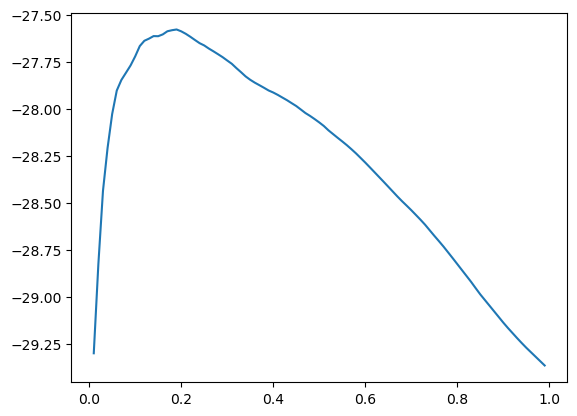

In [4]:
#lasso regression
lm_l = Lasso(alpha = .19)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

alpha = []
error = []

for i  in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))

plt.plot(alpha, error)       
       


In [5]:
#gives each point's error value 
err = tuple(zip(alpha, error))
#finding out the point which gives us the best error term 
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)] # weve now made a little improvement when compared to the linear regression error



,alpha,error
18,0.19,-27.577845


In [6]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))
 

-21.629238835051016

In [7]:
 
#tune these models using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error', 'absolute_error'), 'max_features': ('1.0', 'sqrt', 'log2')}
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error' , cv = 3)
gs.fit(X_train, y_train)
gs.best_score_
gs.best_estimator_


/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
174 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/h

RandomForestRegressor(max_features='sqrt', n_estimators=220)

In [8]:
#test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)

919675397.7358999

In [10]:
mean_absolute_error(y_test, tpred_lml)

27.958601426151716

In [11]:
mean_absolute_error(y_test, tpred_rf)

17.586607687614396

In [15]:


#pickel the model(essentially making an object of the model thats been trained already,  This allows you to save trained models to disk and load them back into memory at a later time for making predictions or further training without needing to retrain the model from scratch.)
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open('model_file' + '.p', 'wb'))



In [13]:
file_name  = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']


X_test.iloc[1,:].values

model.predict(X_test.iloc[1,:].values.reshape(1,-1))

/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([71.98181818])

In [16]:
# list(X_test.iloc[1,:])